<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto Aplicado III
---

<h1 align=left><font size = 7, style="color:rgb(300,0,0)">Modelo de recomendação de livros</font></h2>
<hr>

# Identificação

## Turma
Turma: *PROJETO APLICADO III 2024/2*

# Integrantes do Grupo
André Dalle Vedove Canassa – 10415817

Valdo Alvim da Rocha Junior – 10414936

Victor Teodoro - 10414609

# Modelo de recomendação de livros por meio da avaliação de leitores

O projeto realizado pela equipe da Universidade Presbiteriana Mackenzie, Faculdade de Computação e Informática, tem como objetivo desenvolver um modelo de recomendação de livros baseado em avaliações de usuários, utilizando técnicas de aprendizado de máquina para analisar padrões de preferências e comportamentos de leitura. A meta principal é criar um sistema capaz de sugerir livros personalizados para cada usuário, com base em suas avaliações anteriores e nas similaridades entre usuários e livros, promovendo uma experiência de recomendação precisa e eficiente.

Os dados utilizados foram coletados do site Kaggle e compreendem informações de avaliações de livros, usuários e informações sobre os livros.

O projeto define um modelo analítico que inclui o uso da linguagem de programação Python e bibliotecas, sendo elas: pandas, numpy, matplotlib, seaborn, sklearn e scipy.sparse. O cronograma detalhado inclui encontros síncronos, períodos de trabalho e entregas das etapas do projeto.


## Origem dos Dados
Os dados utilizados neste projeto foram obtidos a partir do conjunto de dados disponível na plataforma Kaggle, especificamente do conjunto intitulado "Book Recommender System". Este conjunto de dados é acessível através do link: https://www.kaggle.com/datasets/rxsraghavagrawal/book-recommender-system/code

### Descrição dos Dados

1. **BX-Books.csv**: contém informações sobre os livros, e cada coluna descreve uma característica de cada livro listado.
   
   Colunas relevantes:
   - `ISBN`: Identificador único para cada livro 
   - `Book-Title`: O título do livro
   - `Book-Author`: O autor do livro
   - `Year-Of-Publication`: O ano de publicação do livro
   - `Publisher`: A editora que publicou o livro
   - `Image-URL-S, Image-URL-M, Image-URL-L`: URLs de imagens da capa do livro em três diferentes tamanhos (pequeno, médio e grande)   


2. **BX-Users.csv**: Este arquivo contém revisões dos imóveis listados.

   Colunas:
   - `User-ID`: Identificador único para cada usuário
   - `Location`: A localização do usuário, geralmente no formato "cidade, estado, país"
   - `Age`: A idade do usuário


2. **BX-Book-Ratings.csv**: Este arquivo contém revisões dos imóveis listados.

   Colunas:
   - `User-ID`: Identificador único para cada usuário
   - `ISBN`: Identificador único para cada livro
   - `Book-Rating`: A avaliação dada ao livro pelo usuário.
````

In [42]:
import pandas as pd      # Para manipulação de dados
import numpy as np       # Para operações matemáticas
import matplotlib.pyplot as plt  # Para visualização
import seaborn as sns    # Para visualizações aprimoradas
from sklearn.model_selection import train_test_split  # Para dividir os dados
from sklearn.metrics import mean_squared_error  # Para avaliar o modelo
from scipy.sparse import csr_matrix  # Para lidar com matrizes esparsas
from sklearn.neighbors import NearestNeighbors  # Para modelo KNN

## Importação da base de dados, análise exploratória e tratamento dos dados ##

In [43]:
# Carregar dados
books = pd.read_csv('C:/Users/Picha/Desktop/Projeto Aplicado III/database/BX-Books.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')
users = pd.read_csv('C:/Users/Picha/Desktop/Projeto Aplicado III/database/BX-Users.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')
ratings = pd.read_csv('C:/Users/Picha/Desktop/Projeto Aplicado III/database/BX-Book-Ratings.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')

# Verificar as primeiras linhas
display(books)
display(users)
display(ratings)

# Verificar os tipos de dados e valores ausentes
print(books.info())
print(users.info())
print(ratings.info())


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), obje

In [44]:
# Remover entradas com valores ausentes
books_cleaned = books.dropna()

In [45]:
#limpeza de informações irrelevantes e renomear colunas
books.rename(columns= {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'book_rating'}, inplace=True)
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [46]:
books

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [47]:
#Quantidade de ratings(avaliações) por usuário
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [48]:
#Usuários que tem mais de 100 avaliações, vamos nomear essa variável de x
x = ratings['user_id'].value_counts() > 100
display(x)

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: count, Length: 105283, dtype: bool

In [49]:
#Quantidade de usuários que fizeram mais de 100 avaliações, vamos nomear essa variável de y
y = x[x].index
print(y.shape)

(1825,)


In [50]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       238186,  99441, 187410, 262070,  70183,  40553,  39345, 266283, 189666,
       140879],
      dtype='int64', name='user_id', length=1825)

In [51]:
#Trazer somente usuários que avaliaram mais de 100 vezes 
ratings = ratings[ratings['user_id'].isin(y)]

In [52]:
ratings

,user_id,ISBN,book_rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


In [53]:
#Juntando Tabelas de Avaliação com a Tabela de livros com Join ou Merge, chave primária = ISBN
rating_books = ratings.merge(books, on = 'ISBN')
rating_books

,user_id,ISBN,book_rating,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...,...,...
604849,276680,089587167X,7,Something Blue,Jean Christopher Spaugh,1997,John F. Blair Publisher,http://images.amazon.com/images/P/089587167X.0...,http://images.amazon.com/images/P/089587167X.0...,http://images.amazon.com/images/P/089587167X.0...
604850,276680,1402201435,4,The One True Ocean,Sarah Beth Martin,2003,Sourcebooks Landmark,http://images.amazon.com/images/P/1402201435.0...,http://images.amazon.com/images/P/1402201435.0...,http://images.amazon.com/images/P/1402201435.0...
604851,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...
604852,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...


In [54]:
# Quantidade de vezes que o livro foi avaliado
number_ratings = rating_books.groupby('title')['book_rating'].count().reset_index()
number_ratings

,title,book_rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
182179,Ã?Â?berraschung am Valentinstag.,1
182180,Ã?Â?lpiraten.,1
182181,Ã?Â?rger mit Produkt X. Roman.,2
182182,Ã?Â?stlich der Berge.,1


In [55]:
number_ratings.rename(columns={'book_rating':'number_of_ratings'}, inplace=True)
number_ratings

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
182179,Ã?Â?berraschung am Valentinstag.,1
182180,Ã?Â?lpiraten.,1
182181,Ã?Â?rger mit Produkt X. Roman.,2
182182,Ã?Â?stlich der Berge.,1


In [56]:
#Tabela Final juntar a tabela de livros (rating_books) com as avaliações com a tabela de quantidade de avaliações por livros (number_ratings)
final_rating = rating_books.merge(number_ratings, on='title')
final_rating.drop(columns={'Image-URL-S', 'Image-URL-L', 'Image-URL-M'}, inplace=True)
final_rating

,user_id,ISBN,book_rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
...,...,...,...,...,...,...,...,...
604849,276680,089587167X,7,Something Blue,Jean Christopher Spaugh,1997,John F. Blair Publisher,1
604850,276680,1402201435,4,The One True Ocean,Sarah Beth Martin,2003,Sourcebooks Landmark,1
604851,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,1
604852,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,1


In [57]:
#Verificando a existência de anos incorretos ou incoerentes
unique_years = final_rating['year'].unique()
print(unique_years)

['1994' '2003' '1999' '1995' '1993' '1990' '1996' '1998' '2002' '1988'
 '1920' '2001' '2004' '1997' '0' '1976' '2000' '1992' '1982' '1991' '1989'
 '1985' '1984' '1979' '1974' '1986' '1977' '1987' '1972' '1983' '1958'
 '1980' '1978' '1940' '1975' '1981' '1959' '1960' '1968' '1970' '1971'
 '1969' '1973' '1950' '1966' '1963' '1953' '1947' '1962' '1943' '1965'
 '1936' '1957' '1961' '1955' '1930' '1964' '1951' '1942' '1952' '1956'
 '1954' '2030' '1967' '2021' '1946' '2005' '1941' '1923' '1948' '1945'
 '2011' '2010' '1937' '1925' '1927' '1938' '1949' '2020' '1939' '1911'
 '1929' '1900' '1944' '1932' '1933' '1922' '1926' '1897' '2050' '1902'
 '1924' '1921' '2038' '2006' '1901' '2026' '1378' 'DK Publishing Inc'
 'Gallimard' '1928' '1906' '1806' '1935']


In [58]:
# Convertendo a coluna 'year' para numérico, forçando erros a se tornarem NaN
final_rating['year'] = pd.to_numeric(final_rating['year'], errors='coerce')

# Filtrando anos válidos: entre 1900 e 2023
final_rating = final_rating[(final_rating['year'] >= 1900) & (final_rating['year'] <= 2023)]

# Mostrando a nova base de dados
print(final_rating)

        user_id        ISBN  book_rating  \
0        276925  002542730X           10   
1        277427  002542730X           10   
2          3363  002542730X            0   
3         10030  002542730X            7   
4         11676  002542730X            6   
...         ...         ...          ...   
604849   276680  089587167X            7   
604850   276680  1402201435            4   
604851   276680  1564407284            0   
604852   276680  1582343594            0   
604853   276680  1888173408            7   

                                                    title  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1       Politically Correct Bedtime Stories: Modern Ta...   
2       Politically Correct Bedtime Stories: Modern Ta...   
3       Politically Correct Bedtime Stories: Modern Ta...   
4       Politically Correct Bedtime Stories: Modern Ta...   
...                                                   ...   
604849                                     S

In [59]:
unique_years = final_rating['year'].unique()
print(unique_years)

[1994. 2003. 1999. 1995. 1993. 1990. 1996. 1998. 2002. 1988. 1920. 2001.
 2004. 1997. 1976. 2000. 1992. 1982. 1991. 1989. 1985. 1984. 1979. 1974.
 1986. 1977. 1987. 1972. 1983. 1958. 1980. 1978. 1940. 1975. 1981. 1959.
 1960. 1968. 1970. 1971. 1969. 1973. 1950. 1966. 1963. 1953. 1947. 1962.
 1943. 1965. 1936. 1957. 1961. 1955. 1930. 1964. 1951. 1942. 1952. 1956.
 1954. 1967. 2021. 1946. 2005. 1941. 1923. 1948. 1945. 2011. 2010. 1937.
 1925. 1927. 1938. 1949. 2020. 1939. 1911. 1929. 1900. 1944. 1932. 1933.
 1922. 1926. 1902. 1924. 1921. 2006. 1901. 1928. 1906. 1935.]


C:\Users\Picha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Picha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


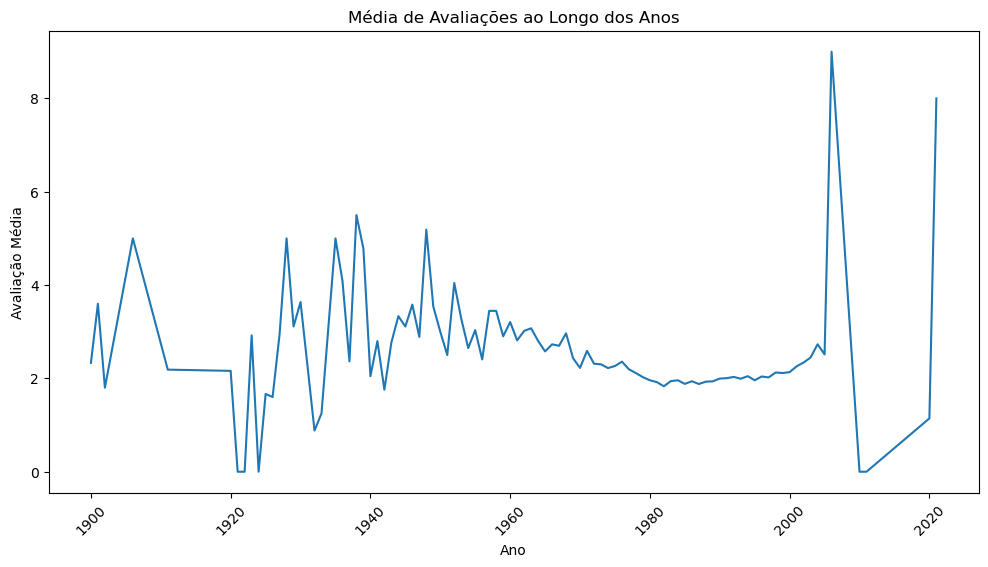

In [60]:
# Média de avaliações ao longo dos anos
avg_rating_per_year = final_rating.groupby('year')['book_rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values)
plt.title('Média de Avaliações ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=45)
plt.show()


C:\Users\Picha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


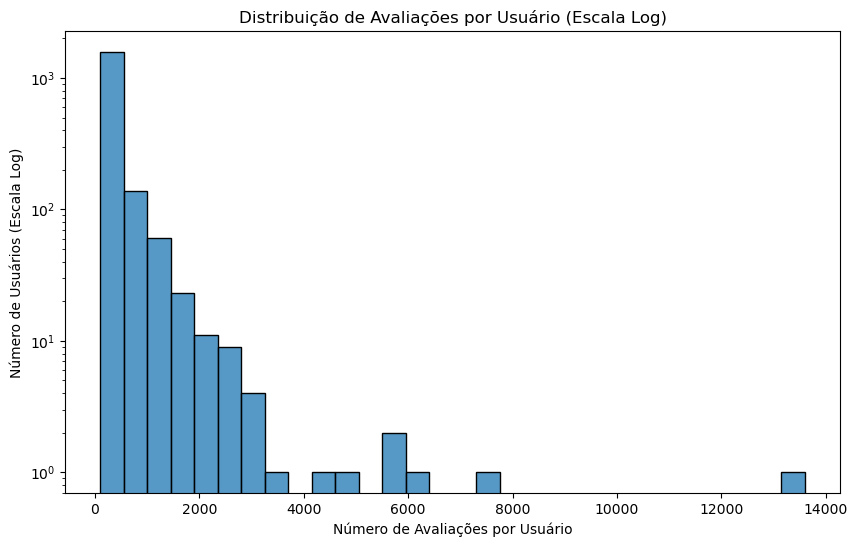

C:\Users\Picha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


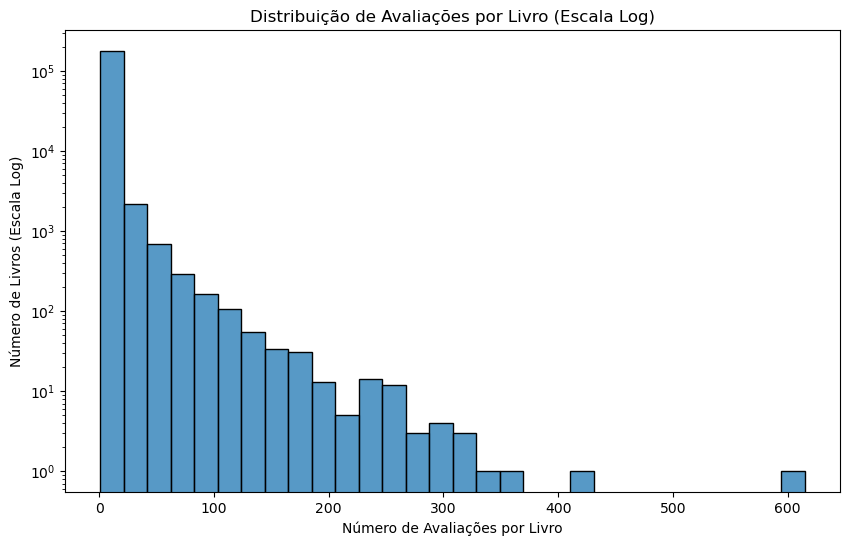

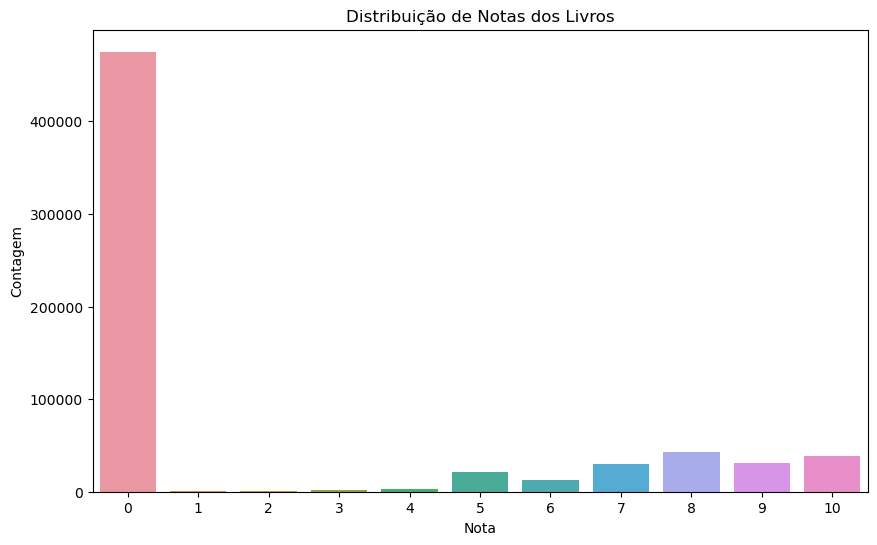

In [61]:
# 1. Distribuição do número de livros avaliados por usuário
user_ratings_count = ratings.groupby('user_id')['book_rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=30, kde=False)
plt.yscale('log')  # Escala logarítmica no eixo y
plt.title('Distribuição de Avaliações por Usuário (Escala Log)')
plt.xlabel('Número de Avaliações por Usuário')
plt.ylabel('Número de Usuários (Escala Log)')
plt.show()

# 2. Disparidade no número de avaliações por livro
book_ratings_count = final_rating.groupby('title')['book_rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(book_ratings_count, bins=30, kde=False)
plt.yscale('log')  # Escala logarítmica no eixo y
plt.title('Distribuição de Avaliações por Livro (Escala Log)')
plt.xlabel('Número de Avaliações por Livro')
plt.ylabel('Número de Livros (Escala Log)')
plt.show()

# 3. Concentração de valores altos de ratings (4 e 5)
plt.figure(figsize=(10, 6))
sns.countplot(x='book_rating', data=ratings)
plt.title('Distribuição de Notas dos Livros')
plt.xlabel('Nota')
plt.ylabel('Contagem')
plt.show()


#### Transformação da base em uma Matriz

As avaliações dos usuários serão usadas como variáveis para fazer a análise preditiva.



In [62]:
#filtrar livros que tenham mais de 50 avaliações 
final_rating = final_rating[final_rating['number_of_ratings'] > 50]
final_rating

,user_id,ISBN,book_rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
...,...,...,...,...,...,...,...,...
365113,189835,067081458X,5,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62
365114,211426,067081458X,0,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62
365115,236283,067081458X,10,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62
365116,245371,067081458X,0,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62


In [63]:
#Descartar valores duplicados
final_rating.loc[:,('user_id','title')]
final_rating

,user_id,ISBN,book_rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
...,...,...,...,...,...,...,...,...
365113,189835,067081458X,5,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62
365114,211426,067081458X,0,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62
365115,236283,067081458X,10,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62
365116,245371,067081458X,0,The Eyes of the Dragon,Stephen King,1987.0,Viking Books,62


In [64]:
# transposição dos usuários (user_id) em colunas:
book_pivot = rating_books.pivot_table(columns ='user_id', index='title', values='book_rating')
book_pivot.shape

(182184, 1825)

In [65]:
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276463,276538,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Always Have Popsicles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple Magic (The Collector's series),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beyond IBM: Leadership Marketing and Finance for the 1990s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã?Â?berraschung am Valentinstag.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ã?Â?lpiraten.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ã?Â?rger mit Produkt X. Roman.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#Transformar valores nulos em zero
book_pivot.fillna(0, inplace=True)
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276463,276538,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always Have Popsicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple Magic (The Collector's series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã?Â?berraschung am Valentinstag.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ã?Â?lpiraten.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ã?Â?rger mit Produkt X. Roman.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#Transformar matriz em matriz esparça
book_sparce = csr_matrix(book_pivot)
book_sparce

<182184x1825 sparse matrix of type '<class 'numpy.float64'>'
	with 163989 stored elements in Compressed Sparse Row format>

## Preparação dos Dados para Modelagem

Utilizando o algoritmo KNN (K-nearest neighbors), este método classifica cada amostra do conjunto de dados com base na proximidade dos vizinhos mais próximos. O KNN calcula a distância entre a amostra e seus vizinhos, e se a maioria desses vizinhos pertencer a uma determinada classe, a amostra será atribuída a essa mesma categoria.

In [68]:
model = NearestNeighbors(algorithm ='brute')
model.fit(book_sparce) #treino 

NearestNeighbors(algorithm='brute')

In [69]:
book_pivot.head(21)

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276463,276538,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always Have Popsicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple Magic (The Collector's series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dark Justice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deceived,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
#Passar os parâmetros de busca, inserir o índice 
#Livro: Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))
distances, sugestions = model.kneighbors(book_pivot.iloc[20, :].values.reshape(1,-1))

In [71]:
#para fazer a predição do modelo
for i in range(len(sugestions)):
    print(book_pivot.index[sugestions[i]])

Index([' Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))',
       'Wolf Tracks (Annie O'Hara &amp; Claudius Mysteries)',
       'Murder Can Botch Up Your Birthday (Desiree Shapiro Mystery)',
       'Legend of the Jade Dragon', 'Six Strokes Under'],
      dtype='object', name='title')
